# Toronto anomalies analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
import utils
import os.path

## Load data

In [3]:
SITE = 7879
channels = pd.read_csv('../dataset/channels.csv')
channels[channels.siteId == SITE]

,siteId,channelId,channelName,units,isCalculated
81434,7879,11723,MP1 BTYVOLT,V,False
81435,7879,11722,MP1 UpDEPTH_1,mm,False
81436,7879,11721,MP1 UNIDEPTH,mm,False
81437,7879,11720,MP1 RAWVEL,m/s,False
81438,7879,11719,MP1 PEAKVEL_1,m/s,False
81439,7879,11718,MP1 PDEPTH_1,mm,False
81440,7879,14031,Raw Average Velocity,m/s,False
81441,7879,19696,MP1 VInterim,m/s,False
81442,7879,14232,Rainfall,mm,False
81443,7879,13428,MP1 SILT1,mm,False


In [5]:
DFINAL = 11724
PDEPTH_1 = 11718
UpDEPTH_1 = 11722
DINTERIM = 19294
dfinal = utils.load_channel_data(SITE, DFINAL).rename('DFINAL').fillna(0)
pdepth = utils.load_channel_data(SITE, PDEPTH_1).rename('PDEPTH_1').fillna(0)
updepth = utils.load_channel_data(SITE, UpDEPTH_1).rename('UpDEPTH_1').fillna(0)
dinterim = utils.load_channel_data(SITE, DINTERIM).rename('DInterim').fillna(0)
df = pd.concat([dfinal, pdepth, updepth, dinterim], axis=1).dropna()
df['pdepth_diff'] = np.abs(df.DFINAL - df.PDEPTH_1)
df['updepth_diff'] = np.abs(df.DFINAL - df.UpDEPTH_1)
df['dinterim_diff'] = np.abs(df.DFINAL - df.DInterim)
print('Anomalies in PDEPTH: {:}'.format(len(df[df['pdepth_diff'] > 1])))
print('Anomalies in UpDEPTH: {:}'.format(len(df[df['updepth_diff'] > 1])))
print('Anomalies in DInterim: {:}'.format(len(df[df['dinterim_diff'] > 1])))
print(df.head())
print(df.tail())
anomalies = df[df.updepth_diff > 1]
anomalies[['DFINAL', 'UpDEPTH_1', 'PDEPTH_1']].head(20)

Anomalies in PDEPTH: 203920
Anomalies in UpDEPTH: 6152
Anomalies in DInterim: 0
                         DFINAL    PDEPTH_1   UpDEPTH_1    DInterim  \
time                                                                  
2015-10-06 12:55:00  486.119995  486.119995  485.589996  486.119995   
2015-10-06 13:00:00  502.399994  485.170013  502.399994  502.399994   
2015-10-06 13:05:00  498.489990  480.859985  498.489990  498.489990   
2015-10-06 13:10:00  499.910004  484.359985  499.910004  499.910004   
2015-10-06 13:15:00  498.869995  482.709991  498.869995  498.869995   

                     pdepth_diff  updepth_diff  dinterim_diff  
time                                                           
2015-10-06 12:55:00     0.000000      0.529999            0.0  
2015-10-06 13:00:00    17.229980      0.000000            0.0  
2015-10-06 13:05:00    17.630005      0.000000            0.0  
2015-10-06 13:10:00    15.550018      0.000000            0.0  
2015-10-06 13:15:00    16.160004      

,DFINAL,UpDEPTH_1,PDEPTH_1
time,,,
2015-10-30 01:40:00,428.679993,184.360001,428.679993
2015-10-30 04:40:00,386.040009,209.600006,386.040009
2015-10-30 13:20:00,508.410004,15.880000,508.410004
2015-12-14 19:10:00,525.309998,614.890015,615.830017
2015-12-14 19:15:00,541.419983,614.419983,615.150024
2015-12-14 19:20:00,540.690002,651.119995,706.799988
2015-12-14 19:25:00,542.799988,591.450012,583.380005
2015-12-14 19:30:00,544.380005,590.700012,585.169983
2016-04-04 00:00:00,462.940002,18.230000,18.180000


## Plot anomalies

PDEPTH


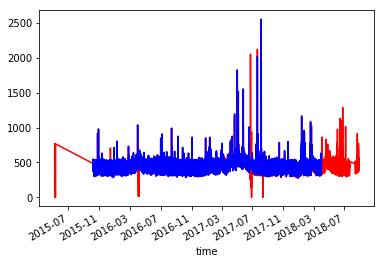

UpDEPTH


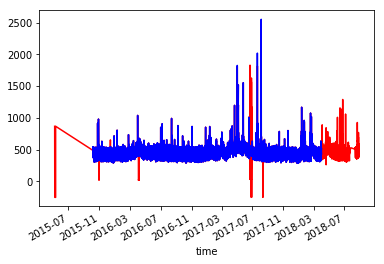

In [6]:
def plot_anomalies(start_day, end_day):
    print('PDEPTH')
    pdepth[start_day:end_day].plot(color='r')
    dfinal[start_day:end_day].plot(color='b')
    plt.show()
    print('UpDEPTH')
    updepth[start_day:end_day].plot(color='r')
    dfinal[start_day:end_day].plot(color='b')
    plt.show()
    
plot_anomalies('2000-01-01', '2020-01-01')

### Autumn 2015

PDEPTH


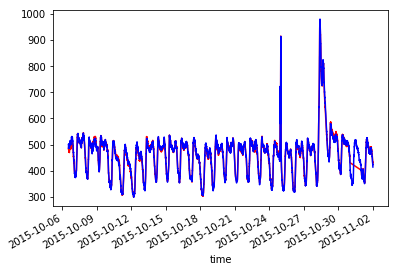

UpDEPTH


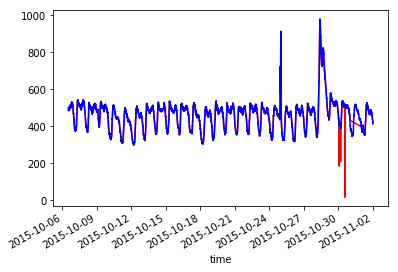

In [7]:
plot_anomalies('2015-08-01', '2015-11-01')

PDEPTH


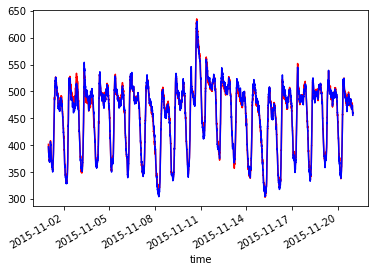

UpDEPTH


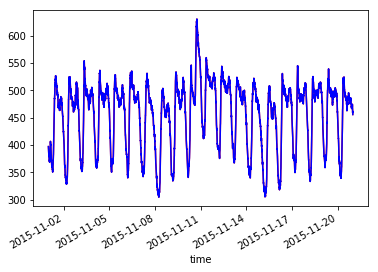

In [8]:
plot_anomalies('2015-11-01', '2015-11-20')

### Winter 2016

PDEPTH


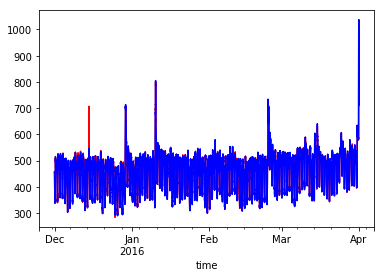

UpDEPTH


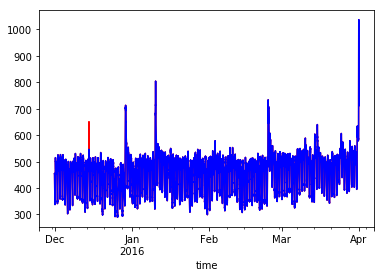

In [9]:
plot_anomalies('2015-12-01', '2016-03-31')

PDEPTH


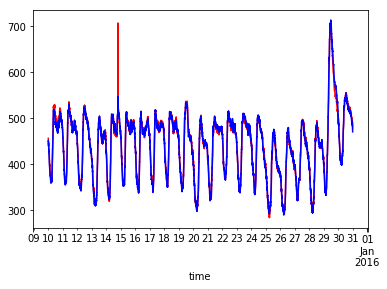

UpDEPTH


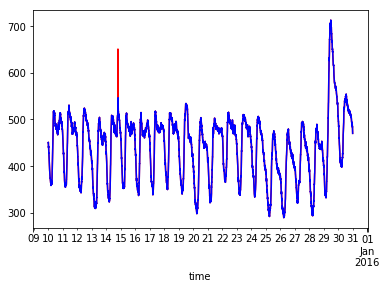

In [10]:
plot_anomalies('2015-12-10', '2015-12-30')

### Spring 2017

PDEPTH


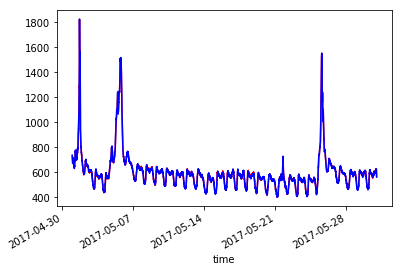

UpDEPTH


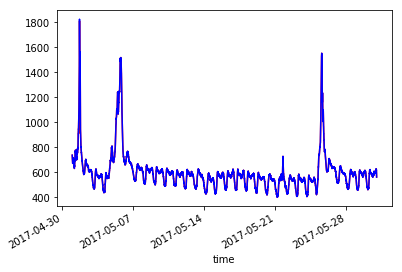

In [11]:
plot_anomalies('2017-05-01', '2017-05-30')

PDEPTH


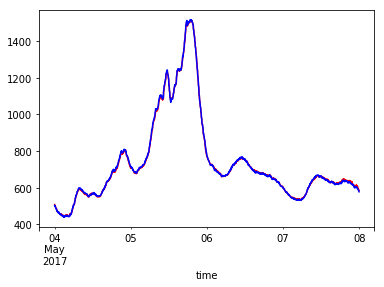

UpDEPTH


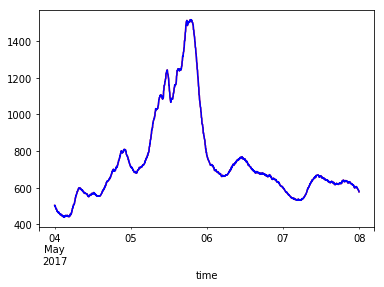

In [12]:
plot_anomalies('2017-05-04', '2017-05-07')